In [1]:
##importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [7]:
train_data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [14]:
## Droping not required columns
x=train_data.drop(['financial_institution','loan_id','origination_date','first_payment_date','number_of_borrowers'],axis=1)

In [15]:
x.columns

Index(['source', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [16]:
 
x.dtypes

source                       object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
loan_to_value                 int64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                           int64
dtype: object

In [18]:
##Checking for Missing values
x.isnull().sum()

source                      0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
loan_to_value               0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [19]:

X1=x.drop('m13',axis=1) # X1 contains all the columns except target column i.e m13
y=x['m13']

In [24]:
X1=pd.get_dummies(X1) # dummy columns for categorial data
X1.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,...,m9,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,22.0,694.0,30.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
1,4.875,144000,360,72,44.0,697.0,0.0,0.0,0.0,0,...,0,0,1,0,0,1,0,0,1,0
2,3.250,366000,180,49,33.0,780.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,0
3,4.750,135000,360,46,44.0,633.0,0.0,638.0,0.0,0,...,1,1,1,1,1,0,0,0,1,0
4,4.750,124000,360,80,43.0,681.0,0.0,0.0,0.0,0,...,8,9,10,11,1,0,0,0,0,1


In [25]:
# spliting the dataset into trainng & testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=400)

In [26]:
# importing Bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:

clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [28]:
Fitting the Model
clf.fit(X_train,y_train)

E:\anaconda\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [29]:
# out of Bag accuracy
clf.oob_score_

0.9956917907071926

In [30]:
# Model accuracy in testing set
clf.score(X_test,y_test)

0.9956918835085301

In [32]:
#Let find ougt the number of tress with more accuracy
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

E:\anaconda\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9952717403011438
************************
For n_estimators = 30
OOB score is 0.9958102664627447
************************
For n_estimators = 50
OOB score is 0.9958964306486009
************************
For n_estimators = 70
OOB score is 0.995939512741529
************************
For n_estimators = 90
OOB score is 0.995907201171833
************************
For n_estimators = 110
OOB score is 0.9958318075092087
************************
For n_estimators = 130
OOB score is 0.9958425780324408
************************
For n_estimators = 150
OOB score is 0.9958102664627447
************************
For n_estimators = 170
OOB score is 0.9958318075092087
************************
For n_estimators = 190
OOB score is 0.9958425780324408
************************
For n_estimators = 210
OOB score is 0.995907201171833
************************
For n_estimators = 230
OOB score is 0.995939512741529
************************
For n_estimators = 250
OOB score is 0.99596105378

In [33]:
#Finalizing on a tree model with 90 trees
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=90,random_state=400,
                      base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=90, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [36]:
clf.oob_score_
clf.score(X_test,y_test)

0.9956488023436154

In [37]:
# We can extract feature importance from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [38]:
feature_importance=pd.Series(imp,index=X1.columns.tolist())

In [39]:
feature_importance.sort_values(ascending=False)

m12                         0.300388
unpaid_principal_bal        0.129466
borrower_credit_score       0.100703
debt_to_income_ratio        0.076351
loan_to_value               0.072237
interest_rate               0.065675
m11                         0.043554
co-borrower_credit_score    0.041010
m9                          0.021910
loan_term                   0.017309
source_Y                    0.012493
m7                          0.012474
loan_purpose_B12            0.011695
m10                         0.011339
insurance_percent           0.009951
loan_purpose_A23            0.009783
loan_purpose_C86            0.009148
source_X                    0.009119
source_Z                    0.007712
m4                          0.007413
m8                          0.006382
m2                          0.005396
m6                          0.005195
m1                          0.004597
m5                          0.003779
insurance_type              0.002674
m3                          0.002250
d

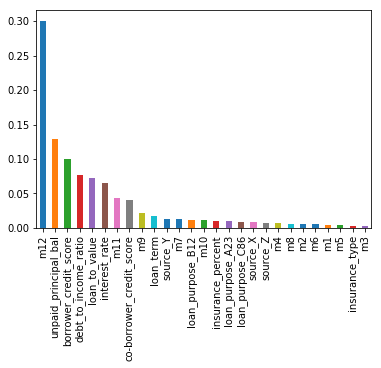

In [40]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

In [42]:
test_data=pd.read_csv('test.csv')

In [43]:
test_data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers           int64
debt_to_income_ratio          int64
borrower_credit_score         int64
loan_purpose                 object
insurance_percent             int64
co-borrower_credit_score      int64
insurance_type                int64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [45]:
test=test_data.drop(['financial_institution','loan_id','origination_date','first_payment_date','number_of_borrowers'],axis=1)

In [47]:
test.dtypes

source                       object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
loan_to_value                 int64
debt_to_income_ratio          int64
borrower_credit_score         int64
loan_purpose                 object
insurance_percent             int64
co-borrower_credit_score      int64
insurance_type                int64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
dtype: object

In [48]:
test=pd.get_dummies(test)

In [49]:
test.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,...,m9,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,3.875,417000,360,75,20,790,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,4.500,113000,360,80,33,793,0,784,0,0,...,0,0,0,0,1,0,0,0,0,1
2,4.500,72000,360,75,34,710,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4.125,123000,180,41,24,798,0,813,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.250,166000,180,53,12,767,0,768,0,0,...,0,0,0,0,1,0,0,1,0,0


In [51]:
output=clf.predict(test)

In [54]:
op=pd.DataFrame(output)

In [58]:

op.to_csv('op.csv')